## Build Triton and Neptune

9000.0


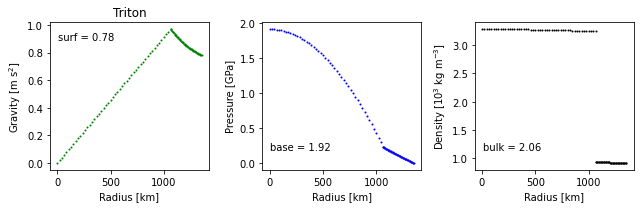

0.9993462429538973


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from TidalPy import build_world, Orbit
from TidalPy.tools.conversions import semi_a2orbital_motion

neptune = build_world('Neptune')
sol = build_world('Sol')
triton = build_world('Triton')
triton_cpl = build_world('Triton_Simple')
triton_cpl.tides.set_fixed_q(10.)
triton_ctl = build_world('Triton_Simple')
triton_ctl.config['tides']['use_ctl'] = True
triton_ctl.tides.set_fixed_q(10.)
triton_ctl.reinit()

print(neptune.tides.fixed_q)

# See how the interior of the rheology-based world was built
triton.paint()
print(triton.mass / 2.1390e22)

## Set the thermal state of the viscoelastic Triton

In [2]:
triton.crust.set_strength(viscosity=1.0e14, shear_modulus=3.3e9)
triton.core.set_strength(viscosity=1.0e24, shear_modulus=50.0e9)

In [3]:
triton.crust.tidal_scale = triton.crust.volume / triton.volume
triton.core.tidal_scale = triton.core.volume / triton.volume

print(triton.crust.tidal_scale)
print(triton.core.tidal_scale)

0.5136695144707671
0.4863304855292328


## Add worlds into an orbit

In [4]:
orbit = Orbit(sol, neptune, triton, make_copies='star and host')
orbit_cpl = Orbit(sol, neptune, triton_cpl, make_copies='star and host')
orbit_ctl = Orbit(sol, neptune, triton_ctl, make_copies='star and host')

## Compare the CTL, CPL and Rheology-Based Models

In [12]:
# Set triton with an eccentricity of 0.1 to mimic its early history
spin_period_day = -np.linspace(0.5, 50., 8000)
semi_major_axis = (55. * neptune.radius) * np.ones_like(spin_period_day)
orbital_motion = -semi_a2orbital_motion(semi_major_axis, neptune.mass, triton.mass)
eccentricity = 0.3
neptune_obliquity = 157.3
triton_obliquity = 0.

orbit.tidal_objects[0].set_state(eccentricity=eccentricity, spin_period=0.6713, orbital_frequency=orbital_motion,
                                 obliquity=np.radians(neptune_obliquity))
orbit_cpl.tidal_objects[0].set_state(eccentricity=eccentricity, spin_period=0.6713, orbital_frequency=orbital_motion,
                                     obliquity=np.radians(neptune_obliquity))
orbit_ctl.tidal_objects[0].set_state(eccentricity=eccentricity, spin_period=0.6713, orbital_frequency=orbital_motion,
                                     obliquity=np.radians(neptune_obliquity))

# Change the CTL planet's fixed dt to match the orbital period
orbit_ctl.tidal_objects[1].tides.set_fixed_dt(-86400. * orbit.tidal_objects[1].orbital_period)

orbit.tidal_objects[1].set_state(eccentricity=eccentricity, spin_period=spin_period_day, orbital_frequency=orbital_motion,
                                 obliquity=np.radians(triton_obliquity))
orbit_cpl.tidal_objects[1].set_state(eccentricity=eccentricity, spin_period=spin_period_day, orbital_frequency=orbital_motion,
                                     obliquity=np.radians(triton_obliquity))
orbit_ctl.tidal_objects[1].set_state(eccentricity=eccentricity, spin_period=spin_period_day, orbital_frequency=orbital_motion,
                                     obliquity=np.radians(triton_obliquity))

da_dt_zero = orbit.semi_major_axis_time_derivatives[1]
da_dt_cpl_zero = orbit_cpl.semi_major_axis_time_derivatives[1]
da_dt_ctl_zero = orbit_ctl.semi_major_axis_time_derivatives[1]

m_sec_to_NR_myr = 3.154e13 / neptune.radius
da_dt_zero *= m_sec_to_NR_myr
da_dt_cpl_zero *= m_sec_to_NR_myr
da_dt_ctl_zero *= m_sec_to_NR_myr

In [13]:
# Set triton with an eccentricity of 0.1 to mimic its early history
eccentricity = 0.3
neptune_obliquity = 157.3
triton_obliquity = 20.

orbit.tidal_objects[0].set_state(eccentricity=eccentricity, spin_period=0.6713, orbital_frequency=orbital_motion,
                                 obliquity=np.radians(neptune_obliquity))
orbit_cpl.tidal_objects[0].set_state(eccentricity=eccentricity, spin_period=0.6713, orbital_frequency=orbital_motion,
                                     obliquity=np.radians(neptune_obliquity))
orbit_ctl.tidal_objects[0].set_state(eccentricity=eccentricity, spin_period=0.6713, orbital_frequency=orbital_motion,
                                     obliquity=np.radians(neptune_obliquity))

orbit.tidal_objects[1].set_state(eccentricity=eccentricity, spin_period=spin_period_day, orbital_frequency=orbital_motion,
                                 obliquity=np.radians(triton_obliquity))
orbit_cpl.tidal_objects[1].set_state(eccentricity=eccentricity, spin_period=spin_period_day, orbital_frequency=orbital_motion,
                                     obliquity=np.radians(triton_obliquity))
orbit_ctl.tidal_objects[1].set_state(eccentricity=eccentricity, spin_period=spin_period_day, orbital_frequency=orbital_motion,
                                     obliquity=np.radians(triton_obliquity))

da_dt_nonzero = orbit.semi_major_axis_time_derivatives[1]
da_dt_cpl_nonzero = orbit_cpl.semi_major_axis_time_derivatives[1]
da_dt_ctl_nonzero = orbit_ctl.semi_major_axis_time_derivatives[1]

m_sec_to_NR_myr = 3.154e13 / neptune.radius
da_dt_nonzero *= m_sec_to_NR_myr
da_dt_cpl_nonzero *= m_sec_to_NR_myr
da_dt_ctl_nonzero *= m_sec_to_NR_myr

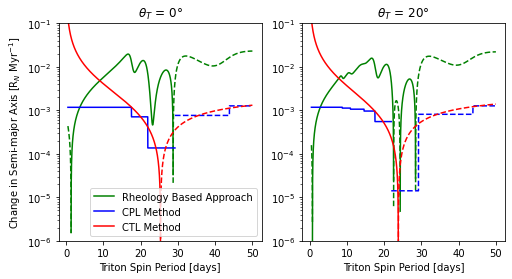

In [14]:
from TidalPy.utilities.numpy_helper import neg_array_for_log_plot
fig, axes = plt.subplots(ncols=2, figsize=(8,4))

# Make spin-rate positive for plotting
spin_period_day_plot = np.abs(spin_period_day)

ax_zero = axes[0]
ax_nonzero = axes[1]
da_dt_pos_zero, da_dt_neg_zero = neg_array_for_log_plot(da_dt_zero)
da_dt_cpl_pos_zero, da_dt_cpl_neg_zero = neg_array_for_log_plot(da_dt_cpl_zero)
da_dt_ctl_pos_zero, da_dt_ctl_neg_zero = neg_array_for_log_plot(da_dt_ctl_zero)

ax_zero.plot(spin_period_day_plot, da_dt_pos_zero, '-g', label='Rheology Based Approach')
ax_zero.plot(spin_period_day_plot, da_dt_neg_zero, '--g')
ax_zero.plot(spin_period_day_plot, da_dt_cpl_pos_zero, '-b', label='CPL Method')
ax_zero.plot(spin_period_day_plot, da_dt_cpl_neg_zero, '--b')
ax_zero.plot(spin_period_day_plot, da_dt_ctl_pos_zero, '-r', label='CTL Method')
ax_zero.plot(spin_period_day_plot, da_dt_ctl_neg_zero, '--r')
ax_zero.legend(loc='best')
ax_zero.set(yscale='log', xlabel='Triton Spin Period [days]', ylabel='Change in Semi-major Axis [R$_{N}$ Myr$^{-1}$]')
ax_zero.set(ylim=[1e-6, 1e-1])
ax_zero.set(title="$\\theta_{T}$ = 0$\\degree$")

da_dt_pos_nonzero, da_dt_neg_nonzero = neg_array_for_log_plot(da_dt_nonzero)
da_dt_cpl_pos_nonzero, da_dt_cpl_neg_nonzero = neg_array_for_log_plot(da_dt_cpl_nonzero)
da_dt_ctl_pos_nonzero, da_dt_ctl_neg_nonzero = neg_array_for_log_plot(da_dt_ctl_nonzero)

ax_nonzero.plot(spin_period_day_plot, da_dt_pos_nonzero, '-g', label='Rheology Based Approach')
ax_nonzero.plot(spin_period_day_plot, da_dt_neg_nonzero, '--g')
ax_nonzero.plot(spin_period_day_plot, da_dt_cpl_pos_nonzero, '-b', label='CPL Method')
ax_nonzero.plot(spin_period_day_plot, da_dt_cpl_neg_nonzero, '--b')
ax_nonzero.plot(spin_period_day_plot, da_dt_ctl_pos_nonzero, '-r', label='CTL Method')
ax_nonzero.plot(spin_period_day_plot, da_dt_ctl_neg_nonzero, '--r')

# ax_nonzero.legend(loc='best')
ax_nonzero.set(yscale='log', xlabel='Triton Spin Period [days]')
ax_nonzero.set(ylim=[1e-6, 1e-1])
ax_nonzero.set(title="$\\theta_{T}$ = 20$\\degree$")
plt.show()

fig.savefig('TritonExplore.pdf')